In [1]:
# ==== Mount Google Drive ====
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 安装依赖
!pip install -q "flwr[simulation]" torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.6/617.6 kB 43.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 44.0.3 

In [3]:
# Federated+clusrer 30min → 30min(add time feature)

# ----  Set Project Root Directory ----
import os, sys
project_root = "/content/drive/MyDrive/elec_forecasting"
os.chdir(project_root)
sys.path.append(project_root)

# ---- Import modules ----
from utils.visualization import (
    save_sorted_r2_plot,
    save_sorted_mae_plot,
    save_sorted_rmse_plot,
    plot_clustered_vs_timefeat_clustered
)


In [ ]:
# Step 2: 训练带聚类的联邦模型
!python cluster/run_clustered_fl.py


流式输出内容被截断，只能显示最后 5000 行内容。
(ClientAppActor pid=10984)             This is a deprecated feature. It will be removed
(ClientAppActor pid=10984)             entirely in future versions of Flower.
(ClientAppActor pid=10984)         
(ClientAppActor pid=10984) Loading cached dataset from: data/cached/dataset_w6_h6_sum_normX_resample5min_timefeat.pkl
(ClientAppActor pid=10983) [H9] round=21  R²=0.370  MAE=115.2
(ClientAppActor pid=10983) 
(ClientAppActor pid=10983)         
(ClientAppActor pid=10984) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`. [repeated 2x across cluster]
(ClientAppActor pid=10983) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid: str">}. You can import the `Context` like this: `from flwr.commo

In [ ]:
!python cluster/generate_all_eval_metrics_best.py


 Processing cluster_0
[cluster_0]  Saved best-round metrics to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min_t/cluster_0/eval_metrics_best.csv

 Processing cluster_1
[cluster_1]  Saved best-round metrics to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min_t/cluster_1/eval_metrics_best.csv

 Processing cluster_2
[cluster_2]  Saved best-round metrics to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min_t/cluster_2/eval_metrics_best.csv


In [4]:
!python cluster/postprocess_all_clusters.py

2025-08-24 21:10:18.608732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756069818.635857   43981 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756069818.643716   43981 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756069818.663942   43981 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756069818.663984   43981 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756069818.663989   43981 computation_placer.cc:177] computation placer alr

In [ ]:
!python cluster/merge_all_eval_best.py

✅ Appended GLOBAL-ALL from global_all_metrics.csv
✅ Merged successfully: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/30min_30min_t/merged_eval_metrics_best.csv


R² comparison plot saved to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/merged_plots/r2_sorted_plot.png


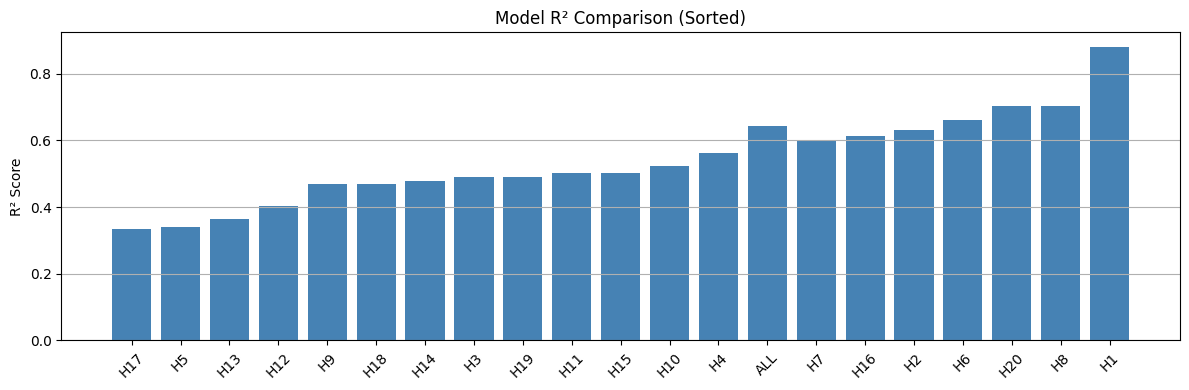

MAE comparison plot saved to: /content/drive/MyDrive/elec_forecasting/experiments/clustered_fl/merged_plots/mae_sorted_plot.png


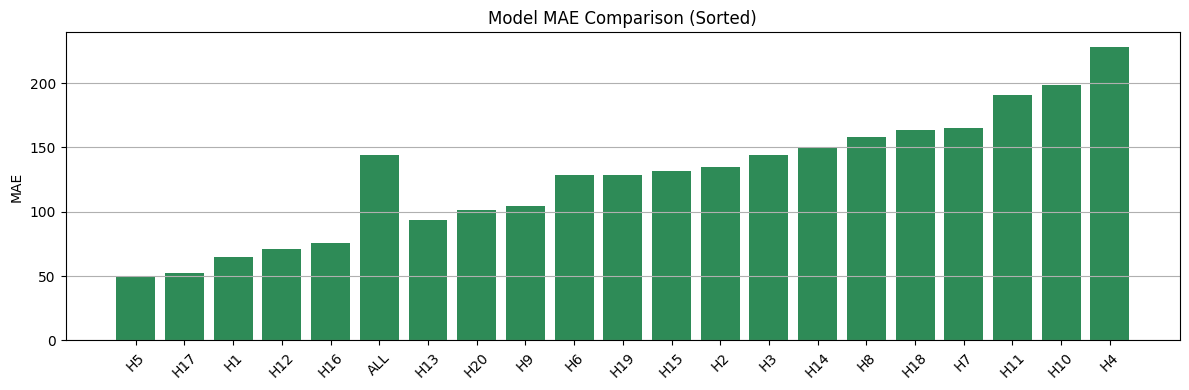

In [ ]:
project_root = "/content/drive/MyDrive/elec_forecasting"
eval_csv_path = os.path.join(project_root, "experiments", "clustered_fl", "30min_30min_t", "merged_eval_metrics_best.csv")
plot_dir = os.path.join(project_root, "experiments", "clustered_fl","30min_30min_t", "merged_plots")
os.makedirs(plot_dir, exist_ok=True)

save_sorted_r2_plot(eval_csv_path, save_path=os.path.join(plot_dir, "r2_sorted_plot.png"))
save_sorted_mae_plot(eval_csv_path, save_path=os.path.join(plot_dir, "mae_sorted_plot.png"))


In [2]:
# Step 3: 绘制 Federated + Cluster + Time features (C-FL-T) 预测曲线

import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ===== 基本路径 =====
PROJECT_ROOT  = "/content/drive/MyDrive/elec_forecasting"
BASE_TARGET   = "30min_30min_t"
BASE_EXP_DIR  = os.path.join(PROJECT_ROOT, "experiments", "clustered_fl", BASE_TARGET)
RESAMPLE_FREQ = "5min"
SAMPLE_RANGE  = None      # None 自动按一天的点数画 (288)

# ===== 绘图函数 =====
def plot_prediction(y_true, y_pred, save_path=None,
                    title="Prediction vs. Actual", sample_range=None,
                    time_index=None, household_id=None, resample_freq="5min"):
    def _get_minutes(freq_str):
        try:
            delta = pd.Timedelta(freq_str)
            return int(delta.total_seconds() / 60)
        except:
            return 5

    if sample_range is None:
        freq_minutes = _get_minutes(resample_freq)
        sample_range = max(1, (24*60)//freq_minutes)

    n = min(sample_range, len(y_true), len(y_pred))
    x_axis = time_index[:n] if time_index is not None else range(n)

    plt.figure(figsize=(12,4))
    plt.plot(x_axis, y_true[:n], label="Actual", linewidth=2)
    plt.plot(x_axis, y_pred[:n], label="Predicted", linewidth=2)

    if time_index is not None:
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.gcf().autofmt_xdate()

    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Energy Consumption")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=150)
        print(f"✅ Saved: {save_path}")
    plt.close()

# ===== 遍历 cluster 绘图 =====
for cluster_dir in sorted(glob.glob(os.path.join(BASE_EXP_DIR, "cluster_*"))):
    pred_dir = os.path.join(cluster_dir, "predictions/plot")
    out_dir  = os.path.join(cluster_dir, "plots")
    os.makedirs(out_dir, exist_ok=True)

    for csv_path in glob.glob(os.path.join(pred_dir, "*.csv")):
        hname = os.path.splitext(os.path.basename(csv_path))[0]

        df = pd.read_csv(csv_path)
        # 自动识别列名
        y_col    = [c for c in df.columns if c.lower() in ["y_true","actual","y"]][0]
        yhat_col = [c for c in df.columns if c.lower() in ["y_pred","predicted","yhat"]][0]
        t_col    = next((c for c in df.columns if "time" in c.lower() or "ts" in c.lower()), None)

        y_true = df[y_col].values
        y_pred = df[yhat_col].values
        time_index = pd.to_datetime(df[t_col]) if t_col else None

        save_path = os.path.join(out_dir, f"{hname}.png")
        title = f"Prediction vs. Actual - {hname} - C-FL-T (30min→30min)"
        plot_prediction(y_true, y_pred,
                        save_path=save_path,
                        title=title,
                        sample_range=SAMPLE_RANGE,
                        time_index=time_index,
                        household_id=hname,
                        resample_freq=RESAMPLE_FREQ)

print("\n🎉 全部完成！请在 cluster_x/plots 文件夹查看图片。")



🎉 全部完成！请在 cluster_x/plots 文件夹查看图片。
